This code enables you to connect (draw lines) on the disconnected branch structures.

This is based on the external structure defined in https://doi.org/10.48550/arXiv.2402.07436

and the Stable Volume in HomCloud https://homcloud.dev/index.en.html

Useful when you have disconnected structures, for example, after some image processings and want to connect it in an reproducible way.

In [1]:
import numpy as np
import homcloud.interface as hc
from matplotlib import pyplot as plt
import cv2 
import math
%matplotlib inline

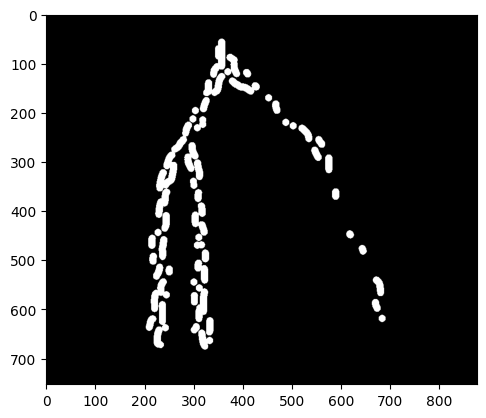

In [2]:
img = cv2.imread("intromodelimage1.png", cv2.IMREAD_UNCHANGED)
ret, img_binary1 = cv2.threshold(img, 90, 255,cv2.THRESH_BINARY)
img_binary=img_binary1[:,:,0]
plt.imshow(img_binary1,cmap='gray')

In [3]:
def onMouse(event, x, y, flags, params):
    global records
    if event == cv2.EVENT_LBUTTONDOWN:
        print(y, x)
        records.append([y,x])

In [4]:
###Add several points on the boundary of the structure
records=[]
cv2.imshow('imagewindow', img_binary)
cv2.setMouseCallback('imagewindow', onMouse)
cv2.waitKey(0)

680 234
681 327
625 689


-1

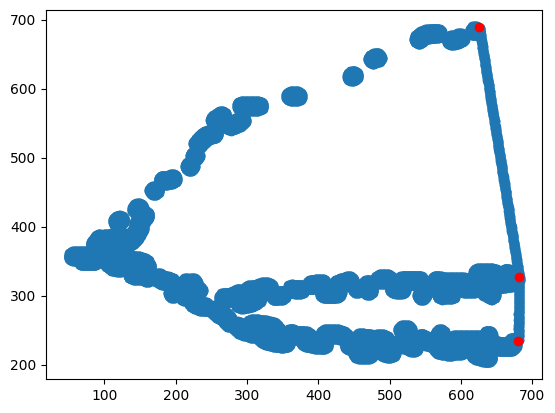

In [5]:
records_arr=np.array(records)
I=np.nonzero(img_binary)
points=np.transpose(np.array([I[0],I[1]]))
manual_boundary=[]
dist=1###interval of the points on the boundary. We connect the points added in the previous step at this interval.
for i in range (0,len(records_arr)-1):
    np.random.seed(23)
    X=records_arr[i]
    Y=records_arr[i+1]
    XYdist=math.sqrt(np.sum(np.square(X-Y)))
    number=int(XYdist/dist)
    for j in range (1,number):
        noise=np.random.rand(2)
        Z=((j*Y+(number-j)*X)/number)+noise
        Z=Z.tolist()
        manual_boundary.append(Z)
manual_boundary=np.array(manual_boundary)
allpoints=np.vstack((points,manual_boundary))

plt.scatter(allpoints[:,0],allpoints[:,1])
plt.scatter(records_arr[:,0],records_arr[:,1],c='red')
plt.show()

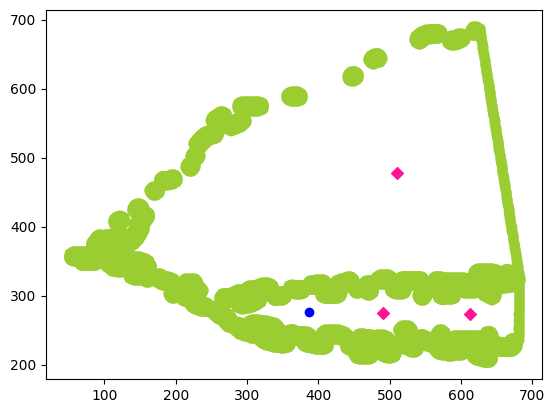

In [6]:
#####PH with additional points
hc.PDList.from_alpha_filtration(allpoints,save_to="pointcloud.pdgm",save_boundary_map=True,no_squared=True)
pdlist = hc.PDList("pointcloud.pdgm")
pd1 = pdlist.dth_diagram(1)
pairs=pd1.pairs()
listpairs=[[pairs[i].birth,pairs[i].death] for i in range (0,len(pairs))]
convhullpairs = list(map(list, set(map(tuple, listpairs))))
convhullpairsarr=np.array(convhullpairs)
####PH without additional points
hc.PDList.from_alpha_filtration(points,save_to="pointcloud2.pdgm",save_boundary_map=True,no_squared=True)
pdlist2 = hc.PDList("pointcloud2.pdgm")
pd21 = pdlist2.dth_diagram(1)
pairs2=pd21.pairs()
listpairs2=[[pairs2[i].birth,pairs2[i].death] for i in range (0,len(pairs2))]
originalpairs = list(map(list, set(map(tuple, listpairs2))))
originalpairsarr=np.array(originalpairs)
######internal parts
intersect = [x for x in convhullpairs if x in originalpairs]
intersectarr=np.array(intersect)
######external parts
onlybranch=[x for x in convhullpairs if x not in originalpairs]
onlybrancharr=np.array(onlybranch)
internallong=[x for x in intersect if x[1]-x[0]>5]
branchlong=[x for x in onlybranch if x[1]-x[0]>5]
###
plt.scatter(allpoints[:,0], allpoints[:,1],color='yellowgreen')
for i in range (0,len(pairs)):
    if [pairs[i].birth,pairs[i].death] in branchlong:
        P=pairs[i].death_position
        x=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[1][1]-P[2][1])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[2][1]-P[0][1])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[0][1]-P[1][1]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        y=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[2][0]-P[1][0])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[0][0]-P[2][0])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[1][0]-P[0][0]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        plt.scatter(x,y,color='deeppink',marker='D')
for i in range (0,len(pairs2)):
    if [pairs2[i].birth,pairs2[i].death] in internallong:
        P=pairs2[i].death_position
        x=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[1][1]-P[2][1])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[2][1]-P[0][1])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[0][1]-P[1][1]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        y=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[2][0]-P[1][0])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[0][0]-P[2][0])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[1][0]-P[0][0]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        plt.scatter(x,y,color='blue',marker='o')
plt.show()      

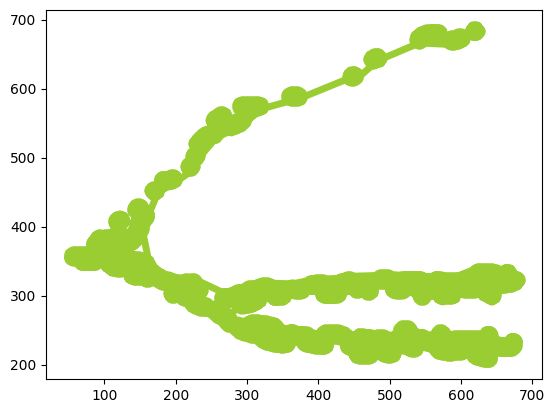

In [7]:
branchlong=[x for x in onlybranch if x[1]-x[0]>15]###you can tune this threshold value
plt.scatter(points[:,0], points[:,1],color='yellowgreen')
for i in range (0,len(pairs)):
    if [pairs[i].birth,pairs[i].death] in branchlong:
        X=pairs[i].stable_volume(4)
        Y=X.boundary()
        Y=np.array(Y)
        for j in range (0,len(Y)):
            if [Y[j][0][0],Y[j][0][1]] not in manual_boundary.tolist() and [Y[j][1][0],Y[j][1][1]] not in manual_boundary.tolist():
                plt.plot([Y[j][0][0], Y[j][1][0]], [Y[j][0][1], Y[j][1][1]],color='yellowgreen',lw=5)
plt.show()